# **Lab 5**

## Data Wrangling - 2

In [1]:
import numpy as np
import pandas as pd

In [68]:
cars = pd.read_csv('clean_imports-85.data.txt')
cars

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [6]:
cars["horsepower"]

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

### Data Transformation

One of the methods that we have learned is **binning**, a process of grouping or categorizing numeric data into discrete "bins" or distinct baskets, which is one of the ways of dealing with noisy data.

In this data, `horsepower` is a real valued variable ranging from 48 to 288, it has 57 unique values in total. What if we only care about the price difference between cars with "high" horsepower, "medium" horsepower, and "low" horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

In [4]:
print (cars["horsepower"].dtype)

float64


To get an idea of how the values are distributed, use matplotlib library to plot its histogram:

Text(0.5, 1.0, 'horsepower bins')

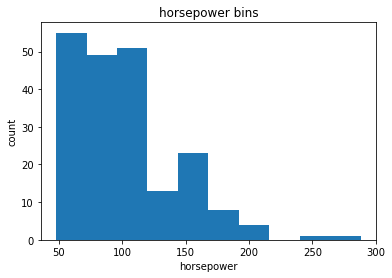

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(cars["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

We want 3 bins of equal size so we can use Numpy's `linspace(start_value, end_value, numbers_generated)` function. To build 3 bins, we need to define 4 dividers or boundaries:

In [7]:
bins = np.linspace(min(cars["horsepower"]), max(cars["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

So these are the dividers of the 3 bins, if we were to give it the starting value, ending value, and the number of values to be generated at equal intervals.

Let's create the bin group names.

In [9]:
group_names = ['Low', 'Medium', 'High']

We can now apply the pandas function `cut` to determine what each value of horsepower belongs to:

In [22]:
cars['horsepower-binned'] = pd.cut(cars['horsepower'], bins, labels=group_names, include_lowest=True )

In [23]:
cars[['horsepower','horsepower-binned']]

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
...,...,...
200,114.0,Low
201,160.0,Medium
202,134.0,Medium
203,106.0,Low


In [24]:
cars["horsepower-binned"].value_counts()

Low       163
Medium     40
High        2
Name: horsepower-binned, dtype: int64

Let's plot the distribution of the bins.

Text(0.5, 1.0, 'Horsepower Bins')

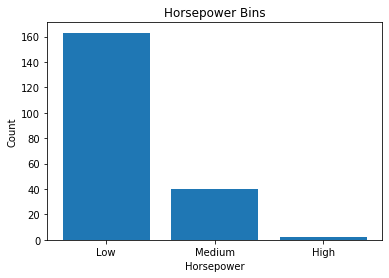

In [25]:
plt.bar(group_names, cars["horsepower-binned"].value_counts())

# set x/y labels and plot title 
plt.xlabel('Horsepower')
plt.ylabel("Count")
plt.title("Horsepower Bins")

In [26]:
# check the dataframe again, you should see the new horsepower-binned column right at the end
cars.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,Low
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,Low
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,Medium
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,Low
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,Low


If you are satisfied with the data you have cleaned so far, you can save it into a CSV file and store it away for later use.

In [50]:
# Convert to CSV file
cars.to_csv('car_data_CLEANED.csv')

### Combining Data

Sometimes we may encounter a situation where we have data coming in from multiple sources, and we want to combine the data into a single consolidated dataframe.

Data contained in pandas objects can be combined together using a number of built-in functions. Among them are:

* **`merge()`** connects rows in DataFrames based on one or more keys. Similar to *inner join* (intersection of keys) operation in RDBMS. Here's some visuals to refresh your memory...
![DB joins](https://i.stack.imgur.com/1UKp7.png)

In [28]:
# we have two DataFrames here, 
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
print(df1)
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2


In [29]:
dfMerged = pd.DataFrame.merge(df1,df2)
print(dfMerged)

  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0


Obviously, doing an *inner join* or a merging of two DataFrames by virtue of the intersection of the two makes sense if we have partial data coming from both sets of data. We can only be sure to preserve keys (and their respective values) that appear on *both* sets of data. An inner join discards data that only appear on one set of data -- for the case of data with key 'c' and 'd'.

However, if you choose to trust all possible data coming from both Dataframes, you may opt for an "outer" merge. Incomplete data will automatically be assigned with a NaN.

In [30]:
dfmergedOuter = pd.merge(df1, df2, how="outer")
print(dfmergedOuter)

# you can also try 'left' and 'right' merge options

  key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    6.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   a    5.0    0.0
6   c    3.0    NaN
7   d    NaN    2.0


`concat()` glues or stacks together objects along an axis. DataFrames can be grouped along its rows (axis=0) or its columns (axis=1) (take note of the convention used in python in axis numbering). Compare the difference between a numpy concat and a pandas concat.

In [39]:
# using numpy concatenate
arr = np.arange(12).reshape((3, 4))
print(arr)
arrN=np.concatenate([arr, arr], axis=0)     # change to axis=0
print(arrN)

# pandas concat
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

concatSeries=pd.concat([s1, s2, s3], axis=0)  # change to axis=0 
print(s1)
print(s2)
print(s3)
print(concatSeries)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64
a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64


By default, pandas concat works along axis=0 if unspecified.

To provide column names for DataFrames, use the parameter `columns` to specify a list of corresponding column names. Upon combination multiple DataFrames, you can also specify keys for the merged subsets. This allows you to quickly access back the previously concatenated subsets.

In [42]:
#data frames and column names
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'], columns=['one', 'two'])
print(df1)
df2 = pd. DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'], columns=['three', 'four'])
print(df2)
dfConcat=pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])
print(dfConcat)

#df1 and df2 canr merge because they don't have a common column

   one  two
a    0    1
b    2    3
c    4    5
   three  four
a      5     6
c      7     8
  level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0


In [47]:
dfConcat['level2']

,three,four
a,5.0,6.0
b,NaN,NaN
c,7.0,8.0


## Groups

In [70]:
cars
cars.drop(cars.columns[0], axis=1, inplace=True)
cars

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [74]:
cars['num-of-doors'].value_counts(normalize=True) #nomalize we divide by the total

four    0.565854
two     0.434146
Name: num-of-doors, dtype: float64

In [76]:
cars['drive-wheels'].value_counts(normalize=True)

fwd    0.585366
rwd    0.370732
4wd    0.043902
Name: drive-wheels, dtype: float64

In [115]:
cars.groupby(['num-of-doors'])

In [81]:
doors = cars.groupby(['num-of-doors'])
doors.ngroups

In [83]:
cars['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [84]:
doors.get_group('two')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000000
1,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000000
2,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000000
5,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000000
9,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998.000000
182,122.0,volkswagen,diesel,std,two,sedan,fwd,front,97.3,171.7,...,97,idi,3.01,3.40,23.0,52.0,4800.0,37,46,7775.000000
183,122.0,volkswagen,gas,std,two,sedan,fwd,front,97.3,171.7,...,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,7975.000000
189,122.0,volkswagen,gas,std,two,convertible,fwd,front,94.5,159.3,...,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,11595.000000


In [ ]:
doors.get_group('two')

In [85]:
doors.get_group('four')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
6,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [87]:
fltr = cars['num-of-doors'] == 'four'
cars[fltr]

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
6,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [88]:
cars[fltr]['num-of-doors'].value_counts()

four    116
Name: num-of-doors, dtype: int64

In [89]:
grp1 = cars.groupby(['num-of-doors','drive-wheels'])

In [90]:
grp1.ngroups #3x2 = 6

6

In [91]:
grp1['num-of-doors'].value_counts()

num-of-doors  drive-wheels  num-of-doors
four          4wd           four             7
              fwd           four            70
              rwd           four            39
two           4wd           two              2
              fwd           two             50
              rwd           two             37
Name: num-of-doors, dtype: int64

In [95]:
grp1['num-of-doors'].value_counts().loc[:,'rwd']

num-of-doors  num-of-doors
four          four            39
two           two             37
Name: num-of-doors, dtype: int64

In [98]:
grp1['num-of-doors'].value_counts().loc['two', 'rwd'] #loc uses column and row name

num-of-doors
two    37
Name: num-of-doors, dtype: int64

In [96]:
grp1['num-of-doors'].apply(lambda x: x.str.upper()).value_counts()

FOUR    116
TWO      89
Name: num-of-doors, dtype: int64

In [97]:
grp1['drive-wheels'].apply(lambda x: x.str.upper()).value_counts()

FWD    120
RWD     76
4WD      9
Name: drive-wheels, dtype: int64

## Use Case: OECD Minimum Wage Data

Let's try our hand at another dataset containing the minimum wages collected from the [OECD](https://en.wikipedia.org/wiki/OECD) group of 32 countries.  

The dataset in CSV has been provided: `oecd_minwage.csv`.

In [108]:
wage = pd.read_csv('oecd_minwage.csv')
wage

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17132.443
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18100.918
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17747.406
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18580.139
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18755.832
...,...,...,...,...,...,...
1403,1403,2012-01-01,Costa Rica,In 2015 constant prices at 2015 USD exchange r...,Hourly,NaN
1404,1404,2013-01-01,Costa Rica,In 2015 constant prices at 2015 USD exchange r...,Hourly,NaN
1405,1405,2014-01-01,Costa Rica,In 2015 constant prices at 2015 USD exchange r...,Hourly,2.410
1406,1406,2015-01-01,Costa Rica,In 2015 constant prices at 2015 USD exchange r...,Hourly,2.560


Let's have a look at the dataframe (show first 5 frames):

In [109]:
wage.drop(wage.columns[0], axis=1, inplace=True)
wage

,Time,Country,Series,Pay period,value
0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17132.443
1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18100.918
2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17747.406
3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18580.139
4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18755.832
...,...,...,...,...,...
1403,2012-01-01,Costa Rica,In 2015 constant prices at 2015 USD exchange r...,Hourly,NaN
1404,2013-01-01,Costa Rica,In 2015 constant prices at 2015 USD exchange r...,Hourly,NaN
1405,2014-01-01,Costa Rica,In 2015 constant prices at 2015 USD exchange r...,Hourly,2.410
1406,2015-01-01,Costa Rica,In 2015 constant prices at 2015 USD exchange r...,Hourly,2.560


The current data condition is difficult to anlayze since there are several dimentions to the data, and that each of these dimensions seemed to be in different formats.

Let's have a peek at various portions of the data. (Note: In pandas, `iloc` method allows direct positional access, just like how we would do for a numpy array.)

In [111]:
wage.iloc[7:11, 0:5]

,Time,Country,Series,Pay period,value
7,2013-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17890.010
8,2014-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17854.875
9,2015-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17907.637
10,2016-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18942.762


In [112]:
wage.iloc[51:55, 0:5]

,Time,Country,Series,Pay period,value
51,2013-01-01,Spain,In 2015 constant prices at 2015 USD PPPs,Annual,12030.048
52,2014-01-01,Spain,In 2015 constant prices at 2015 USD PPPs,Annual,12049.553
53,2015-01-01,Spain,In 2015 constant prices at 2015 USD PPPs,Annual,12170.472
54,2016-01-01,Spain,In 2015 constant prices at 2015 USD PPPs,Annual,12317.413


In [113]:
wage.iloc[260:264, 0:5]

,Time,Country,Series,Pay period,value
260,2013-01-01,New Zealand,In 2015 constant prices at 2015 USD exchange r...,Hourly,9.692
261,2014-01-01,New Zealand,In 2015 constant prices at 2015 USD exchange r...,Hourly,9.834
262,2015-01-01,New Zealand,In 2015 constant prices at 2015 USD exchange r...,Hourly,10.202
263,2016-01-01,New Zealand,In 2015 constant prices at 2015 USD exchange r...,Hourly,10.483


It appears that we have rows further down that belong to a different country, but contain the same 'Time' attribute. There are also information representing different 'Pay period'.

If we were to analyze all these data based on the 'Time' (in other words, the year of the data), then we need to re-organize the data a little. This is where a **pivot table** comes into play. A pivot table performs some summarization or re-organization of the data into a more compact looking table so that it can be meaningfully interpreted or used further for visualization purposes.

We will use `pivot_table` to create a wide format panel, with a `MultiIndex` to handle higher dimensional data. `pivot_table` arguments should specify the data (values), the index, and the columns we want in our resulting dataframe

By passing a list in columns, we can create a MultiIndex in our column axis.

In [120]:
wage_pt = wage.pivot_table(values='value',
                        index='Time',                                 # this is the new index of the pivot table
                        columns=['Country', 'Series', 'Pay period'])  # this specifies grouped columns with multiple indices 
wage_pt

Country                                   Australia            \
Series     In 2015 constant prices at 2015 USD PPPs             
Pay period                                   Annual    Hourly   
Time                                                            
2006-01-01                                20410.652  10.33073   
2007-01-01                                21087.568  10.67106   
2008-01-01                                20718.238  10.48298   
2009-01-01                                20984.768  10.61966   
2010-01-01                                20879.332  10.57090   
2011-01-01                                21037.328  10.65163   
2012-01-01                                21323.830  10.79636   
2013-01-01                                21387.027  10.82608   
2014-01-01                                21453.828  10.85724   
2015-01-01                                21715.529  10.99195   
2016-01-01                                21967.230  11.12024   

Country                                                                \
Series     In 2015 constant prices at 2015 USD exchange rates           
Pay period                                             Annual  Hourly   
Time                                                                    
2006-01-01                                          23826.637  12.060   
2007-01-01                                          24616.844  12.457   
2008-01-01                                          24185.703  12.237   
2009-01-01                                          24496.838  12.397   
2010-01-01                                          24373.756  12.340   
2011-01-01                                          24558.195  12.434   
2012-01-01                                          24892.646  12.603   
2013-01-01                                          24966.422  12.638   
2014-01-01                                          25044.402  12.674   
2015-01-01                                          25349.900  12.832   
2016-01-01                                          25643.729  12.981   

Country                                     Belgium            \
Series     In 2015 constant prices at 2015 USD PPPs             
Pay period                                   Annual    Hourly   
Time                                                            
2006-01-01                                21042.279  10.08859   
2007-01-01                                21310.053  10.21730   
2008-01-01                                21416.957  10.26877   
2009-01-01                                22140.191  10.61538   
2010-01-01                                21810.281  10.45718   
2011-01-01                                21629.799  10.37064   
2012-01-01                                21594.918  10.35381   
2013-01-01                                21783.131  10.44410   
2014-01-01                                21709.326  10.40871   
2015-01-01                                21588.119  10.35060   
2016-01-01                                21170.248  10.15025   

Country                                                                \
Series     In 2015 constant prices at 2015 USD exchange rates           
Pay period                                             Annual  Hourly   
Time                                                                    
2006-01-01                                          20228.742   9.699   
2007-01-01                                          20486.162   9.822   
2008-01-01                                          20588.934   9.872   
2009-01-01                                          21284.205  10.205   
2010-01-01                                          20967.053  10.053   
2011-01-01                                          20793.547   9.970   
2012-01-01                                          20760.014   9.954   
2013-01-01                                          20940.949  10.040   
2014-01-01                                          20869.998  10.006   
201

To more easily filter our time series data later on, we will convert the index into a [`DateTimeIndex`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html).

In [138]:
wage_pt.index = pd.to_datetime(wage_pt.index)
type(wage_pt.index)
wage_pt

Country                                   Australia            \
Series     In 2015 constant prices at 2015 USD PPPs             
Pay period                                   Annual    Hourly   
Time                                                            
2006-01-01                                20410.652  10.33073   
2007-01-01                                21087.568  10.67106   
2008-01-01                                20718.238  10.48298   
2009-01-01                                20984.768  10.61966   
2010-01-01                                20879.332  10.57090   
2011-01-01                                21037.328  10.65163   
2012-01-01                                21323.830  10.79636   
2013-01-01                                21387.027  10.82608   
2014-01-01                                21453.828  10.85724   
2015-01-01                                21715.529  10.99195   
2016-01-01                                21967.230  11.12024   

Country                                                                \
Series     In 2015 constant prices at 2015 USD exchange rates           
Pay period                                             Annual  Hourly   
Time                                                                    
2006-01-01                                          23826.637  12.060   
2007-01-01                                          24616.844  12.457   
2008-01-01                                          24185.703  12.237   
2009-01-01                                          24496.838  12.397   
2010-01-01                                          24373.756  12.340   
2011-01-01                                          24558.195  12.434   
2012-01-01                                          24892.646  12.603   
2013-01-01                                          24966.422  12.638   
2014-01-01                                          25044.402  12.674   
2015-01-01                                          25349.900  12.832   
2016-01-01                                          25643.729  12.981   

Country                                     Belgium            \
Series     In 2015 constant prices at 2015 USD PPPs             
Pay period                                   Annual    Hourly   
Time                                                            
2006-01-01                                21042.279  10.08859   
2007-01-01                                21310.053  10.21730   
2008-01-01                                21416.957  10.26877   
2009-01-01                                22140.191  10.61538   
2010-01-01                                21810.281  10.45718   
2011-01-01                                21629.799  10.37064   
2012-01-01                                21594.918  10.35381   
2013-01-01                                21783.131  10.44410   
2014-01-01                                21709.326  10.40871   
2015-01-01                                21588.119  10.35060   
2016-01-01                                21170.248  10.15025   

Country                                                                \
Series     In 2015 constant prices at 2015 USD exchange rates           
Pay period                                             Annual  Hourly   
Time                                                                    
2006-01-01                                          20228.742   9.699   
2007-01-01                                          20486.162   9.822   
2008-01-01                                          20588.934   9.872   
2009-01-01                                          21284.205  10.205   
2010-01-01                                          20967.053  10.053   
2011-01-01                                          20793.547   9.970   
2012-01-01                                          20760.014   9.954   
2013-01-01                                          20940.949  10.040   
2014-01-01                                          20869.998  10.006   
201

The columns contain multiple levels of indexing, known as a `MultiIndex`, with levels being ordered hierarchically (Country > Series > Pay period). This is known as "concept hierarchy generation".

A `MultiIndex` is the simplest and most flexible way to manage panel data in pandas

In [139]:
type(wage_pt.columns)

pandas.core.indexes.multi.MultiIndex

In [122]:
wage_pt.columns.names

FrozenList(['Country', 'Series', 'Pay period'])

Like before, we can select the country (the top level of our MultiIndex):

In [128]:
wage_pt['Japan']["In 2015 constant prices at 2015 USD PPPs"].head()

Pay period,Annual,Hourly
Time,,
2006-01-01,13082.115,6.28948
2007-01-01,13215.890,6.35379
2008-01-01,13315.404,6.40164
2009-01-01,13781.248,6.62560
2010-01-01,14112.379,6.78480


Here's a nifty trick if you need to look at the pivot table in a different way. "Stacking" and "unstacking" levels of the `MultiIndex` can be used to reshape the dataframe into a desired format.

`stack()` rotates the lowest level of the column `MultiIndex` to the row index, while `unstack()` works in the opposite direction (try it out).

In [129]:
?wage_pt.stack()

Object `wage_pt.stack()` not found.


In [130]:
wage_pt.stack().head()

Country                                              Australia  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                  20410.65200   
           Hourly                                     10.33073   
2007-01-01 Annual                                  21087.56800   
           Hourly                                     10.67106   
2008-01-01 Annual                                  20718.23800   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              23826.637   
           Hourly                                                 12.060   
2007-01-01 Annual                                              24616.844   
           Hourly                                                 12.457   
2008-01-01 Annual                                              24185.703   

Country                                                Belgium  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                  21042.27900   
           Hourly                                     10.08859   
2007-01-01 Annual                                  21310.05300   
           Hourly                                     10.21730   
2008-01-01 Annual                                  21416.95700   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              20228.742   
           Hourly                                                  9.699   
2007-01-01 Annual                                              20486.162   
           Hourly                                                  9.822   
2008-01-01 Annual                                              20588.934   

Country                                                 Brazil  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    3310.5120   
           Hourly                                       1.4100   
2007-01-01 Annual                                    3525.4519   
           Hourly                                       1.5000   
2008-01-01 Annual                                    3664.3911   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              2032.8730   
           Hourly                                                 0.8700   
2007-01-01 Annual                                              2164.8611   
           Hourly                                                 0.9200   
2008-01-01 Annual                                              2250.1780   

Country                                                 Canada  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                  13649.68900   
           Hourly                                      6.56235   
2007-01-01 Annual                                  13785.93500   
           Hourly                                      6.62785   
2008-01-01 Annual                                  14342.76200   

Country                                                  

We can also pass in an argument to select the level we would like to stack (notice how it also auto-sorts that level in order)...

In [135]:
wage_pt.stack(level='Country').head(30)

Series                        In 2015 constant prices at 2015 USD PPPs  \
Pay period                                                      Annual   
Time       Country                                                       
2006-01-01 Australia                                        20410.6520   
           Belgium                                          21042.2790   
           Brazil                                            3310.5120   
           Canada                                           13649.6890   
           Chile                                             5201.6479   
           Colombia                                          6257.7632   
           Czech Republic                                    7991.7749   
           Estonia                                           5179.6499   
           France                                           19295.8260   
           Greece                                           13672.2750   
           Hungary                                           7211.1138   
           Ireland                                          17132.4430   
           Israel                                           11428.6940   
           Japan                                            13082.1150   
           Korea                                            10106.7510   
           Latvia                                            3216.4021   
           Lithuania                                         5336.2148   
           Luxembourg                                       21639.1230   
           Mexico                                            1797.1790   
           Netherlands                                      21681.6580   
           New Zealand                                      15566.1180   
           Poland                                            7104.0459   
           Portugal                                          9067.2871   
           Russian Federation                                1365.3500   
           Slovak Republic                                   6210.7881   
           Slovenia                                         11273.0490   
           Spain                                            11740.0590   
           Turkey                                            8491.3682   
           United Kingdom                                   16764.9690   
           United States                                    12594.3970   

Series                                   \
Pay period                       Hourly   
Time       Country                        
2006-01-01 Australia           10.33073   
           Belgium             10.08859   
           Brazil               1.41000   
           Canada               6.56235   
           Chile                2.22000   
           Colombia             2.14000   
           Czech Republic       3.98087   
           Estonia              2.48333   
           France              10.60213   
           Greece               5.61873   
           Hungary              3.47191   
           Ireland              8.23675   
           Israel               5.12204   
           Japan                6.28948   
           Korea                3.72668   
           Latvia               1.54211   
           Lithuania            2.69131   
           Luxembourg          10.42540   
           Mexico               0.86403   
           Netherlands          9.62567   
           New Zealand          7.48742   
           Poland               3.40605   
           Portugal             3.72628   
           Russian Federation   0.56110   
           Slovak Republic      2.48699   
           Slovenia             5.40484   
           Spain                4.82443   
           Turkey               4.07120   
           United Kingdom       8.06794   
           United States        6.05500   

Series                        In 2015 constant prices at 2015 USD exchange rates  \
Pay period                                           

Using `DatetimeIndex` for 'Time' makes it easy to select a particular time period.

Selecting one year and stacking the two lower levels of the `MultiIndex` creates a cross-section of our panel data.

In [147]:
wage_pt['2016'].stack(level=(1,2)).transpose().head()

/tmp/ipykernel_19962/717233599.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  wage_pt['2016'].stack(level=(1,2)).transpose().head()


Time                                     2016-01-01            \
Series     In 2015 constant prices at 2015 USD PPPs             
Pay period                                   Annual    Hourly   
Country                                                         
Australia                                21967.2300  11.12024   
Belgium                                  21170.2480  10.15025   
Brazil                                    4753.5991   2.00000   
Canada                                   16792.3850   8.07326   
Chile                                     6998.2891   3.00000   

Time                                                                   
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual  Hourly  
Country                                                                
Australia                                          25643.7290  12.981  
Belgium                                            20351.7620   9.758  
Brazil                                              2919.0239   1.240  
Canada                                             17635.6290   8.479  
Chile                                               4485.2412   1.910

To create a filtered dataframe that only takes the hourly minimum wages across countries and time, we can use the `xs()` method to select a cross-section of the data, taking values at lower levels in the multi-index, while keeping the higher levels (countries in this case)

In [140]:
wage_f = wage_pt.xs(('Hourly', 'In 2015 constant prices at 2015 USD exchange rates'),
                     level=('Pay period', 'Series'), 
                     axis=1 )
wage_f.head()

Country,Australia,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Estonia,France,...,New Zealand,Poland,Portugal,Russian Federation,Slovak Republic,Slovenia,Spain,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2006-01-01,12.060,9.699,0.87,6.892,1.42,1.01,NaN,2.274,1.651,10.119,...,8.436,1.686,2.786,0.234,1.501,3.921,3.992,2.273,9.806,6.055
2007-01-01,12.457,9.822,0.92,6.961,1.45,1.02,NaN,2.292,1.858,10.227,...,8.993,1.713,2.840,0.448,1.637,3.877,4.097,2.258,10.070,6.241
2008-01-01,12.237,9.872,0.96,7.242,1.44,1.01,NaN,2.155,2.035,10.245,...,9.287,1.979,2.926,0.393,1.714,3.965,4.139,2.222,10.045,6.781
2009-01-01,12.397,10.205,1.03,7.670,1.52,1.04,NaN,2.133,2.036,10.426,...,9.534,2.160,3.117,0.662,1.883,4.079,4.317,2.279,10.148,7.579
2010-01-01,12.340,10.053,1.08,7.944,1.56,1.06,NaN,2.102,1.978,10.351,...,9.552,2.174,3.244,0.619,1.961,4.809,4.304,2.301,9.960,7.880


Now, this filtered dataframe looks good to be used for some analysis and visualizations.

### Grouping and Summarizing data

Grouping and summarizing data can be particularly useful for understanding large panel datasets. A simple way is to call an aggregation method on the dataframe, such as `.mean()` or `.max()` which is really quick and easy.

For example, we can calculate the average real minimum wage for each country over the period 2006 to 2016 (the default is to aggregate over rows since rows typically constitute data samples)

In [141]:
wage_f.mean()

Country
Australia             12.513909
Belgium                9.939000
Brazil                 1.090909
Canada                 7.819364
Chile                  1.619091
Colombia               1.070909
Costa Rica             2.533333
Czech Republic         2.154182
Estonia                2.076727
France                10.421273
Germany                9.404500
Greece                 4.110000
Hungary                1.904182
Ireland                9.700182
Israel                 5.954000
Japan                  6.179000
Korea                  4.224273
Latvia                 1.797091
Lithuania              1.728727
Luxembourg            11.944909
Mexico                 0.532545
Netherlands            9.642909
New Zealand            9.541545
Poland                 2.243364
Portugal               3.095000
Russian Federation     0.532364
Slovak Republic        1.922000
Slovenia               4.602636
Spain                  4.155818
Turkey                 2.459364
United Kingdom         9.922818


Using this, we can now plot the average minimum wage over a 10-year period (2006-2016) for each OECD country.

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

matplotlib.style.use('seaborn')        # use matplotlib but with seaborn styles...

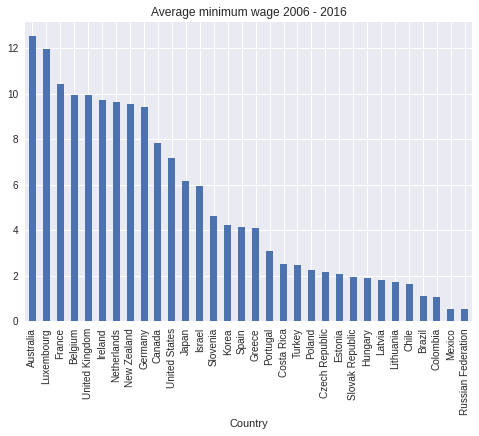

In [148]:
# plotting can be done directly on the dataframe using
wage_f.mean().sort_values(ascending=False).plot(kind='bar', title="Average minimum wage 2006 - 2016")

#Set country labels
country_labels = wage_f.mean().sort_values(ascending=False).index.get_level_values('Country').tolist()
plt.xticks(range(0, len(country_labels)), country_labels)
plt.xlabel('Country')

plt.show()

**Q4**: Figure out how to aggregate over columns, giving the average minimum wage for all countries over the time period. (Hint: the `axis` by default is aggregating over rows).This is what we call a *time series* graph, data over time. 

Text(0.5, 0, 'Date')

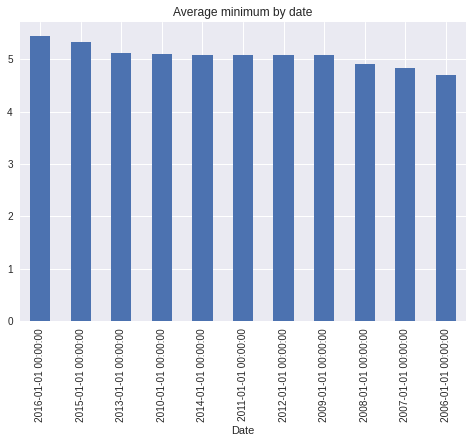

In [154]:
# write your code here

new_wage = wage_f.transpose()
new_wage.mean().sort_values(ascending=False).plot(kind='bar', title="Average minimum by date")
plt.xlabel('Date')